In [2]:
from collections import defaultdict

bin_covs = defaultdict(list)
with open("bins.corrected.csv", 'r') as file:
    for line in file:
        if not line.startswith("#"):
            columns = line.strip().split()
            size = int(columns[0])
            cov = int(columns[1])
            bin_covs[size].append(cov)

In [3]:
meand_sd_results = {}
for size in sorted(bin_covs.keys()):
    covs = bin_covs[size]
    mean_cov = sum(covs) / len(covs)
    sd_cov = (sum((x - mean_cov) ** 2 for x in covs) / len(covs)) ** 0.5
    meand_sd_results[size] = (mean_cov, sd_cov)

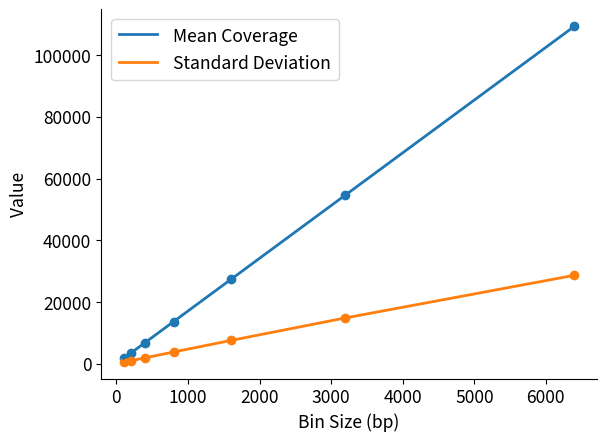

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyfonts import load_google_font

font_path = load_google_font("Source Sans 3")

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 14})
mpl.rcParams['font.family'] = 'Source Sans 3'

# If font_path is a FontProperties object, get the actual path
if hasattr(font_path, 'get_file'):
    mpl.font_manager.fontManager.addfont(font_path.get_file())
else:
    mpl.font_manager.fontManager.addfont(font_path)

sizes = sorted(meand_sd_results.keys())
means = [meand_sd_results[size][0] for size in sizes]
sds = [meand_sd_results[size][1] for size in sizes]
plt.plot(sizes, means, color='#1f77b4', label='Mean Coverage', linewidth=2)
plt.plot(sizes, sds, color='#ff7f0e', label='Standard Deviation', linewidth=2)
plt.scatter(sizes, means, color='#1f77b4')
plt.scatter(sizes, sds, color='#ff7f0e')
plt.legend()
plt.xlabel("Bin Size (bp)")
plt.ylabel("Value")
plt.savefig("mean_sd_per_bin_size.svg")
plt.show()